<a href="https://colab.research.google.com/github/WahyuWahid14/My_Portfolio/blob/main/Analisi_Electric_Vehicle_Washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA WRANGLING**

###**IMPORT LIBRARY**

In [ ]:
import pandas as pd

###**READ DATA AND CLEANING DATA**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Latihan Analisis Data (Electric Vehicle Population) By Kaggle/Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
new_data = df.drop(["State","Legislative District","Vehicle Location", "2020 Census Tract", "Base MSRP"], axis="columns")

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   Postal Code                                        166795 non-null  float64
 4   Model Year                                         166800 non-null  int64  
 5   Make                                               166800 non-null  object 
 6   Model                                              166800 non-null  object 
 7   Electric Vehicle Type                              166800 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  166800 non-null  object

In [ ]:
new_data.isna().sum()

VIN (1-10)                                           0
County                                               5
City                                                 5
Postal Code                                          5
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
DOL Vehicle ID                                       0
Electric Utility                                     5
dtype: int64

In [ ]:
new_data.County.value_counts()

King          86594
Snohomish     19570
Pierce        12972
Clark          9847
Thurston       6042
              ...  
Sacramento        1
Suffolk           1
Las Animas        1
Pitt              1
Ada               1
Name: County, Length: 187, dtype: int64

In [ ]:
new_data.City.value_counts()

Seattle      27831
Bellevue      8364
Redmond       6032
Vancouver     5869
Bothell       5440
             ...  
Bell Hill        1
Sheridan         1
Kenn             1
Miami            1
Stratford        1
Name: City, Length: 704, dtype: int64

In [ ]:
new_data.value_counts('Postal Code')

Postal Code
98052.0    4252
98012.0    3115
98033.0    2840
98006.0    2663
98004.0    2652
           ... 
89129.0       1
89118.0       1
89029.0       1
85250.0       1
99577.0       1
Length: 836, dtype: int64

In [ ]:
new_data.value_counts('Electric Utility')

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 61337
PUGET SOUND ENERGY INC                                                                                        33669
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                  29600
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                               9615
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                7387
                                                                                                              ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ALDER MUTUAL LIGHT CO, INC|PENINSULA LIGHT COMPANY        2
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                                          1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM CO

In [ ]:
new_data["County"].fillna(value="King", inplace=True)

In [ ]:
new_data["City"].fillna(value="Seattle", inplace=True)

In [ ]:
new_data["Postal Code"].fillna(value=98052.0, inplace=True)

In [ ]:
new_data["Electric Utility"].fillna(value="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)", inplace=True)

In [ ]:
new_data.duplicated().sum()

0

In [ ]:
new_data.rename(columns = {"VIN (1-10)":"VIN"}, inplace=True)
new_data.rename(columns = {"County":"Country"}, inplace=True)
new_data.rename(columns = {"Model Year":"Year"}, inplace=True)
new_data.rename(columns = {"Clean Alternative Fuel Vehicle (CAFV) Eligibility":"Clean Alternative Fuel Vehicle"}, inplace=True)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   VIN                             166800 non-null  object 
 1   Country                         166800 non-null  object 
 2   City                            166800 non-null  object 
 3   Postal Code                     166800 non-null  float64
 4   Year                            166800 non-null  int64  
 5   Make                            166800 non-null  object 
 6   Model                           166800 non-null  object 
 7   Electric Vehicle Type           166800 non-null  object 
 8   Clean Alternative Fuel Vehicle  166800 non-null  object 
 9   Electric Range                  166800 non-null  int64  
 10  DOL Vehicle ID                  166800 non-null  int64  
 11  Electric Utility                166800 non-null  object 
dtypes: float64(1), i

In [ ]:
name_file = "Electric_Vehicle_Population_Data"
new_data.to_csv(name_file, index=False)

#**EXPLORATORY DATA**




###**READ DATA**

In [ ]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data")
df.head()


,VIN,Country,City,Postal Code,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle,Electric Range,DOL Vehicle ID,Electric Utility
0,3C3CFFGE4E,Yakima,Yakima,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,1593721,PACIFICORP
1,5YJXCBE40H,Thurston,Olympia,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,257167501,PUGET SOUND ENERGY INC
2,3MW39FS03P,King,Renton,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,224071816,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,7PDSGABA8P,Snohomish,Bothell,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,260084653,PUGET SOUND ENERGY INC
4,5YJ3E1EB8L,King,Kent,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,253771913,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   VIN                             166800 non-null  object 
 1   Country                         166800 non-null  object 
 2   City                            166800 non-null  object 
 3   Postal Code                     166800 non-null  float64
 4   Year                            166800 non-null  int64  
 5   Make                            166800 non-null  object 
 6   Model                           166800 non-null  object 
 7   Electric Vehicle Type           166800 non-null  object 
 8   Clean Alternative Fuel Vehicle  166800 non-null  object 
 9   Electric Range                  166800 non-null  int64  
 10  DOL Vehicle ID                  166800 non-null  int64  
 11  Electric Utility                166800 non-null  object 
dtypes: float64(1), i

###**TREND PUPULASI DI NEGARA BAGIAN WASHINGTHON**

In [ ]:
tren_tahun = df.groupby(['Country', 'Year'])['VIN'].nunique().unstack(fill_value=0)
tren_tahun.loc['King']


Year
1997       0
1998       0
1999       0
2000       3
2002       1
2003       0
2008       8
2010       8
2011      28
2012     121
2013     239
2014     270
2015     308
2016     396
2017     493
2018     617
2019     607
2020     643
2021     976
2022    1536
2023    1908
2024     592
Name: King, dtype: int64

###**RATA-RATA JARAK TEMPUH UNTUK SETIAP MEREK MOBIL**

In [ ]:
df.groupby('Make').agg({'Electric Range':'mean'}).sort_values(by='Electric Range', ascending=False)

,Electric Range
Make,
JAGUAR,203.294118
WHEEGO ELECTRIC CARS,100.000000
TH!NK,100.000000
CHEVROLET,94.956778
FIAT,85.625468
NISSAN,81.542750
TESLA,81.216840
SMART,62.356364
AZURE DYNAMICS,56.000000


###**JUMLAH PRODUKSI UNTUK SETIAP MEREK MOBIL**

In [ ]:
df.value_counts("Make")

Make
TESLA                   74834
NISSAN                  13848
CHEVROLET               13072
FORD                     8577
BMW                      7196
KIA                      6995
TOYOTA                   5812
VOLKSWAGEN               4717
JEEP                     4100
HYUNDAI                  4057
VOLVO                    3962
RIVIAN                   3554
AUDI                     3464
CHRYSLER                 2878
MERCEDES-BENZ            1342
PORSCHE                  1097
MITSUBISHI                941
MINI                      854
POLESTAR                  853
HONDA                     821
FIAT                      801
SUBARU                    788
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   254
CADILLAC                  245
LUCID                     231
JAGUAR                    221
GENESIS                   161
LAND ROVER                 53
ALFA ROMEO                 29
FISKER                     28
DODGE

###**JUMLAH TIPE POPULASI KENDARAAN LISTRIK**

In [ ]:
df.value_counts("Electric Vehicle Type")

Electric Vehicle Type
Battery Electric Vehicle (BEV)            130293
Plug-in Hybrid Electric Vehicle (PHEV)     36507
dtype: int64

#**DATA VISUALISASI**

##**IMPORT LIBRARY**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data")
df.head()

,VIN,Country,City,Postal Code,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle,Electric Range,DOL Vehicle ID,Electric Utility
0,3C3CFFGE4E,Yakima,Yakima,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,1593721,PACIFICORP
1,5YJXCBE40H,Thurston,Olympia,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,257167501,PUGET SOUND ENERGY INC
2,3MW39FS03P,King,Renton,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,224071816,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,7PDSGABA8P,Snohomish,Bothell,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,260084653,PUGET SOUND ENERGY INC
4,5YJ3E1EB8L,King,Kent,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,253771913,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


##**TREND POPULATION COUNTRY IN WASHINGTON**

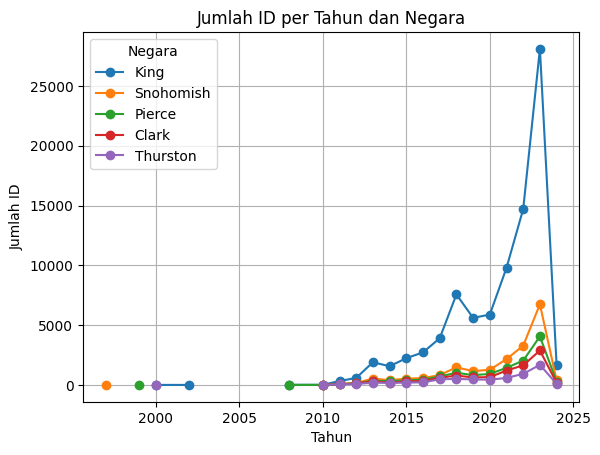

In [ ]:
# Hitung jumlah id per tahun dan negara
pivot_df = df.pivot_table(index='Year', columns='Country', values='VIN', aggfunc='count')

# Pilih hanya lima negara dengan jumlah ID terbanyak
top_5_countries = pivot_df.sum().nlargest(5).index
pivot_df = pivot_df[top_5_countries]

pivot_df.plot(kind='line', marker='o')
plt.title('Jumlah ID per Tahun dan Negara')
plt.xlabel('Tahun')
plt.ylabel('Jumlah ID')
plt.legend(title='Negara')
plt.grid(True)
plt.show()

##**Type**

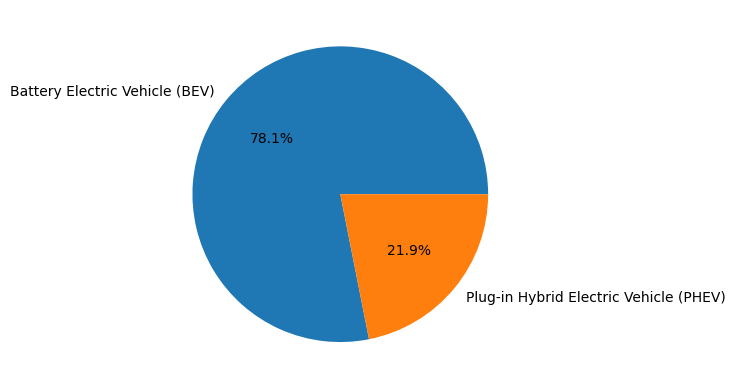

In [ ]:
sumbu_y = df.value_counts("Electric Vehicle Type").sort_values(ascending=False).head(5)
sumbu_x = sumbu_y.index

plt.pie(sumbu_y, labels = sumbu_x, autopct='%1.1f%%')

plt.show()

##**Production Quatity(Make)**

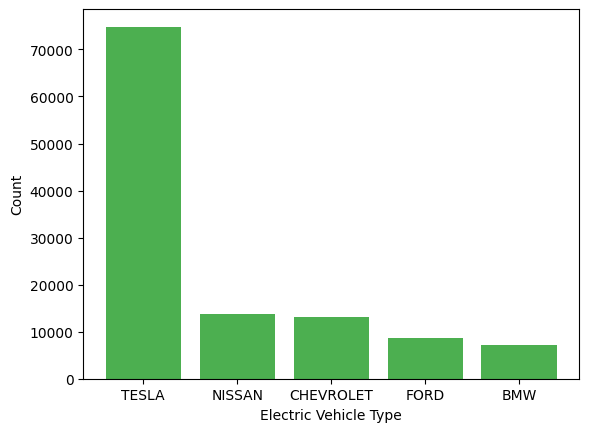

In [ ]:
sumbu_y = df.value_counts("Make").sort_values(ascending=False).head(5)

sumbu_x = sumbu_y.index

plt.bar(sumbu_x,sumbu_y, color = "#4CAF50")

plt.xlabel("Electric Vehicle Type")

plt.ylabel("Count")

plt.show()

In [ ]:
tes = df.value_counts("Country").sort_values(ascending=False).head(5)
print(tes)

Country
King         86599
Snohomish    19570
Pierce       12972
Clark         9847
Thurston      6042
dtype: int64


<Axes: >

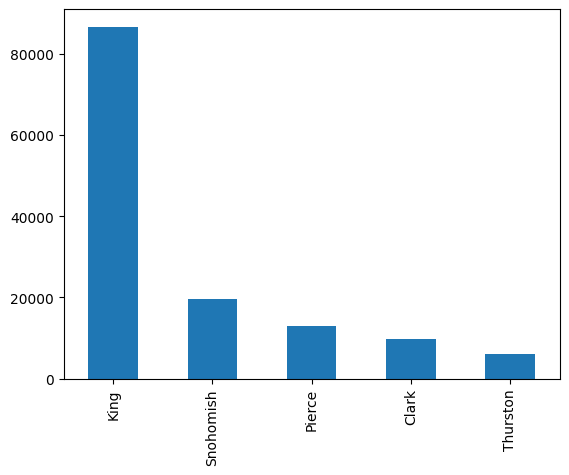

In [ ]:
import matplotlib.pyplot as plt

y1 = df['Country'].value_counts().head(5) # Menghitung jumlah entri per negara dan mengambil lima teratas
y1.plot(kind='bar') # Menggunakan plot jenis bar untuk visualisasi
# plt.xlabel('Country') # Memberi label sumbu x
# plt.ylabel('Count') # Memberi label sumbu y
# plt.title('Top 5 Countries with Most Entries') # Memberi judul plot
# plt.show() # Menampilkan plot


In [ ]:
df.describe()

,Postal Code,Year,Electric Range,DOL Vehicle ID
count,166800.000000,166800.000000,166800.000000,1.668000e+05
mean,98173.710102,2020.341793,61.508993,2.172420e+08
std,2442.547896,3.001465,93.271747,7.727458e+07
min,1730.000000,1997.000000,0.000000,4.385000e+03
25%,98052.000000,2018.000000,0.000000,1.790741e+08
50%,98122.000000,2021.000000,0.000000,2.244045e+08
75%,98371.000000,2023.000000,84.000000,2.513421e+08
max,99577.000000,2024.000000,337.000000,4.792548e+08


In [ ]:
jumlah = df["Country"].count()
print(jumlah)

166800
